# EDA ON SP500 STOCKS

## Import Libraries and extract datas from pickle

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from helpermodules import correlation_study
import pickle
from helpermodules.correlation_study import CorrelationAnalysis

In [6]:
# Take data
with open('pickle_files/cleaned_sp500_df.pkl', 'rb') as f:
    df = pickle.load(f)

This dataframe df contains the cleaned closing prices of all the stocks componing the index SP500 from 2014 to 2024.


## Descriptive Statistics

In [7]:
# Extract tickers
tickers = df.columns.tolist()

# Compute percentage changes and drop NaNs
df_returns = df.pct_change().dropna(how='any')

# Calculate mean, median, standard deviation, skewness, kurtosis for each stock
descriptive_stats = df_returns.describe().transpose()
descriptive_stats['skewness'] = df_returns.skew()
descriptive_stats['kurtosis'] = df_returns.kurtosis()

# Compute mean, median, standard deviation of the mean of pct returns 
avg_stats_mean = descriptive_stats['mean'].describe()

print(avg_stats_mean)

count    469.000000
mean       0.000646
std        0.000394
min       -0.000789
25%        0.000422
50%        0.000586
75%        0.000837
max        0.003719
Name: mean, dtype: float64


1. **Mean:** The overall mean of the average daily percentage returns is approximately 0.000646 (or 0.0646%), indicating a small positive daily return on average for all stocks.

2. **Standard Deviation (std):** The standard deviation of the average daily returns is approximately 0.000394 (or 0.0394%), suggesting low variability in the average daily returns across stocks.

3. **Minimum and Maximum:** The minimum mean daily return is -0.000789 (-0.0789%), while the maximum is 0.003719 (0.3719%). These extremes suggest that while most stocks exhibit small positive returns, there are outliers with both small negative and relatively high positive mean daily returns.

4. **Percentiles (25%, 50%, 75%):** 
   - **25th Percentile (0.000422):** 25% of the stocks have mean daily returns below 0.0422%.
   - **50th Percentile (Median, 0.000586):** The median value represents the midpoint of the mean returns distribution, with half the stocks having returns above this value and half below.
   - **75th Percentile (0.000831):** 75% of the stocks have mean daily returns below 0.0831%, indicating that most stocks cluster around small positive returns.

The distribution of the mean daily percentage returns indicates that the S&P 500 stocks generally show small positive returns, with limited variability. The presence of some outliers, as seen in the minimum and maximum values, suggests a need to consider the effects of extreme performers when analyzing the dataset.

In [8]:
# Count number of stocks with positive skewness
positive_skewness = descriptive_stats['skewness'] > 0
print(f'Number of stocks with positive skewness: {positive_skewness.sum()}')

#Count and print number of stocks with negative kurtois
negative_kurtosis = descriptive_stats['kurtosis'] < 0
print(f'Number of stocks with negative kurtosis: {negative_kurtosis.sum()}')

Number of stocks with positive skewness: 205
Number of stocks with negative kurtosis: 0


Out of the S&P 500 stocks, 205 exhibit positive skewness in their daily returns. Positive skewness indicates that the right tail of the distribution is longer or fatter than the left. This suggests that these stocks have a higher probability of experiencing large positive returns, which may be attractive to investors seeking high-growth opportunities.

None of the stocks have negative kurtosis. Since kurtosis measures the "tailedness" of the distribution, a positive kurtosis indicates heavier tails than a normal distribution (leptokurtic), which is typical for financial return data. This implies that extreme events (both positive and negative) are more likely than would be predicted by a normal distribution.

## Correlation analysis
We'll analyze the correlation between stock returns to identify highly correlated pairs.

In [9]:
# Instantiate the CorrelationAnalysis class with the returns DataFrame
corr_analysis = CorrelationAnalysis(dataframe=df_returns, tickers=tickers)

# Calculate correlation coefficients and p-values
corr_analysis.get_correlated_stocks(use_pct_change=False)

Since the correlation matrix is large (approximately 500x500), plotting it is impractical. Instead, we'll identify and analyze the most correlated stock pair.

['FE', 'MSFT']


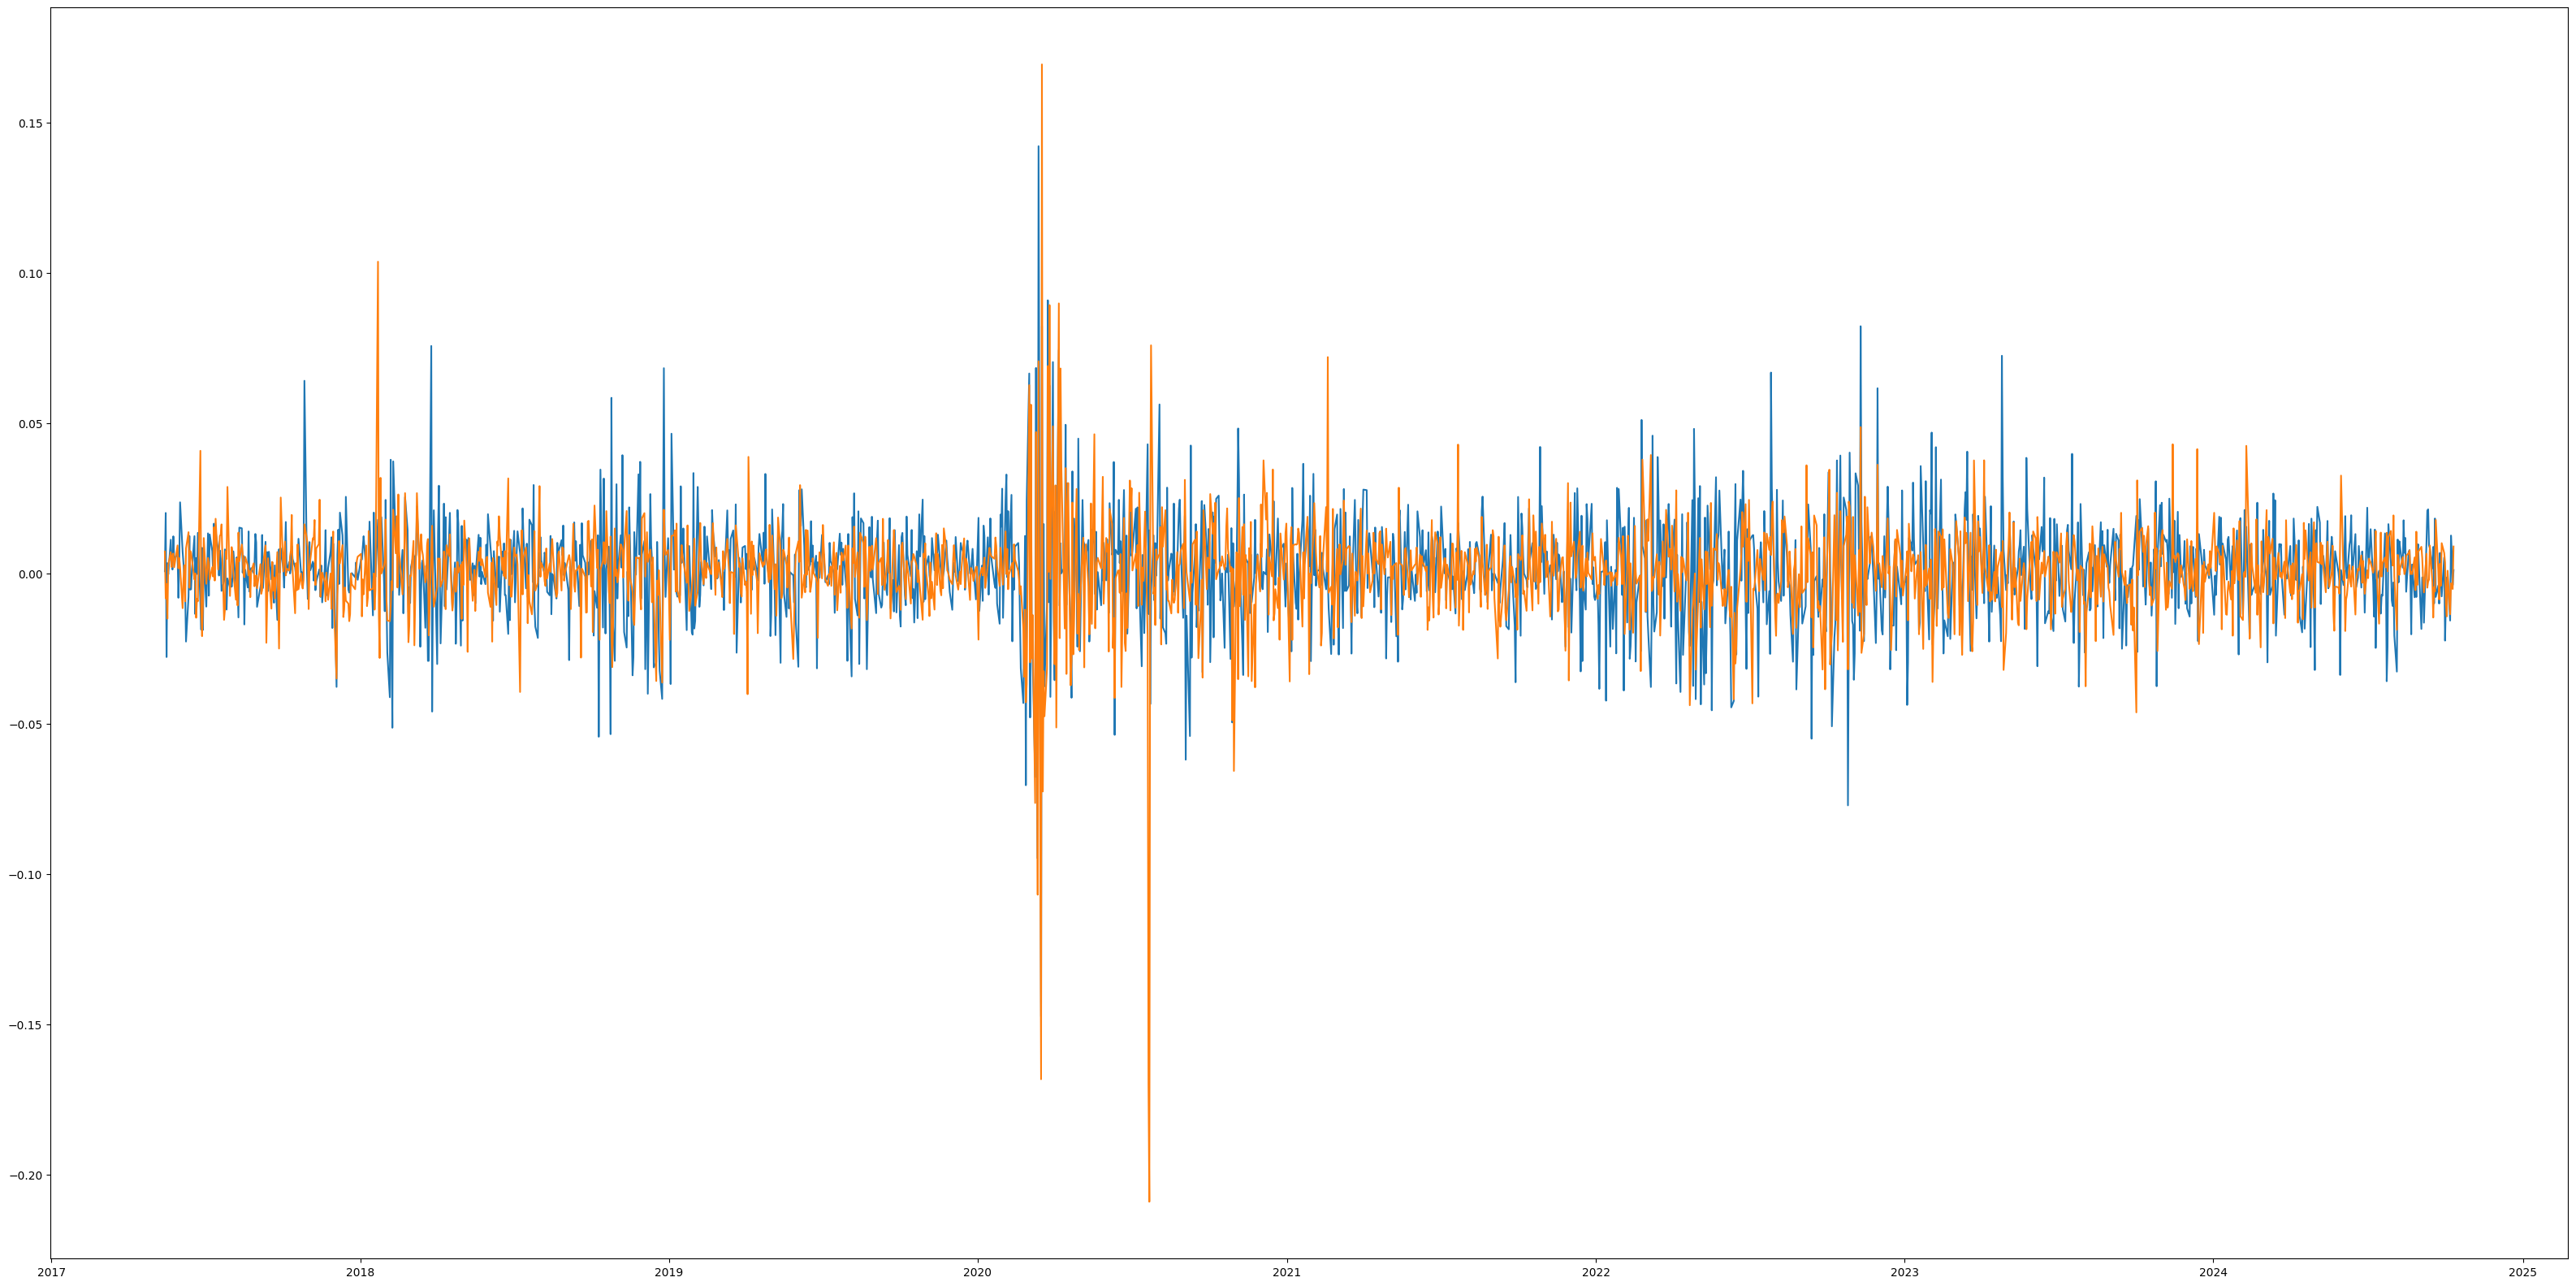

In [10]:
# Identify the most correlated stock pair
corr_analysis.corr_stocks_pair()

In [11]:
# Get the indices of the tickers in the tickers list
index_FE = corr_analysis.tickers.index('FE')
index_MSFT = corr_analysis.tickers.index('MSFT')

# Retrieve the correlation coefficient from the corrvalues array
correlation_coefficient = corr_analysis.corrvalues[index_FE, index_MSFT]

print(f"The correlation coefficient between FE and MSFT is: {correlation_coefficient:.4f}")

The correlation coefficient between FE and MSFT is: 0.3418


The graph visualizes the percentage changes in daily returns for the two most correlated stocks in the S&P 500, identified as **FE (FirstEnergy)** and **MSFT (Microsoft)**. Key observations from the plot are as follows:

1. **Correlation:** The two time series exhibit similar patterns, which is expected given their high correlation. Peaks and troughs in one series are mirrored closely in the other, suggesting that these stocks often respond similarly to market movements.

2. **Volatility:** There are several periods with noticeable spikes in volatility, such as during 2020, which likely corresponds to the market turbulence caused by the COVID-19 pandemic. During these periods, both stocks experienced larger daily percentage changes.

3. **Trend Consistency:** Throughout the observed period (2017–2024), the general behavior of the two stocks is aligned, indicating strong co-movement. This highlights their high correlation in returns over time.

4. **Short-Term Deviations:** While the overall trends are similar, there are short-term deviations where one stock shows a larger change in percentage returns compared to the other. These deviations suggest some differences in how the two stocks react to specific market events.

The stocks FirstEnergy Corp (FE) and Microsoft Corporation (MSFT) have the highest correlation coefficient among all stock pairs in the dataset. This is an interesting result because FE operates in the utilities sector, providing electricity services, while MSFT is a leading technology company.

Possible Reasons: The high correlation between FE and MSFT could be due to broader market movements affecting both stocks similarly over the analyzed period. Alternatively, it may be an anomaly that warrants further investigation, such as checking for data errors or exploring specific events that might have influenced both companies simultaneously.

In [ ]:
# Perform cointegration study
corr_analysis.cointegration_study(use_pct_change=False)

We don't plot heatmaps bcs the dimensions are too big. So propose something do to with what has just been calculated (lags and cointegration) knowing how the libreay works

In [60]:
with open('pickle_files/cointegration_values_array.pkl', 'rb') as f:
    cointegration_values_array = pickle.load(f)

# Take a look at the cointegration values array
print(cointegration_values_array)
# How big is the array?
print(cointegration_values_array.shape)

[[  0.         -43.25371527 -19.15528934 ... -10.21236228 -15.29681859
  -23.34771473]
 [-45.20327966   0.         -16.99262451 ... -27.0621581  -32.93502504
  -44.60204611]
 [-14.97508671 -15.45997926   0.         ... -14.58433961 -14.95522277
  -16.24200832]
 ...
 [-14.68397471 -14.79494622 -14.55048066 ...   0.         -14.82364735
  -47.28932306]
 [-12.92560762 -12.79031353 -12.09490539 ... -12.08165682   0.
  -13.03766967]
 [-45.29081754 -44.55551757 -44.77469866 ... -43.96237019 -31.89373595
    0.        ]]
(469, 469)


In [78]:
# Create a DataFrame from the cointegration array
num_stocks = len(tickers)
coint_df = pd.DataFrame(cointegration_values_array, index=tickers, columns=tickers)

# Set diagonal and upper triangle to NaN to avoid duplicates and self-pairs
coint_df.values[np.triu_indices_from(coint_df)] = np.nan

# Unstack the DataFrame to get pairs
coint_pairs = coint_df.unstack().dropna().reset_index()
coint_pairs.columns = ['Stock1', 'Stock2', 'TestStatistic']

# Sort by the most negative test statistics
coint_pairs_sorted = coint_pairs.sort_values('TestStatistic')

# Select the top 10 most cointegrated pairs
top_cointegrated_pairs = coint_pairs_sorted.head(10)

# Display the top cointegrated pairs
top_cointegrated_pairs


,Stock1,Stock2,TestStatistic
67466,ZBRA,ADI,-53.160129
44320,ZBH,ADI,-52.548728
39161,NWSA,ADI,-51.841779
23756,ALGN,ADI,-51.839407
48236,DIS,ADI,-51.805261
101533,EW,ADI,-51.786117
24926,DRI,TRV,-51.271015
30589,WELL,TRV,-50.930910
102401,CPRT,ADI,-50.927385
33025,UPS,ADI,-50.881743


Repeated Appearance of ADI (Analog Devices, Inc.):

ADI appears in 8 out of the top 10 most cointegrated pairs.
This suggests that ADI has strong cointegration relationships with multiple other stocks.
The companies paired with ADI are from various industries, which is intriguing.
Significant Cointegration Test Statistics:

The test statistics are extremely negative (less than -50).
In cointegration tests, a more negative test statistic indicates stronger evidence of cointegration.
These values are much lower than the typical critical values (e.g., -3.34 at the 5% significance level for the Engle-Granger test).
Diverse Industries:

ZBRA (Zebra Technologies Corporation): Specializes in marking, tracking, and computer printing technologies.
ZBH (Zimmer Biomet Holdings, Inc.): Operates in musculoskeletal healthcare.
NWSA (News Corporation): A media and information services company.
ALGN (Align Technology, Inc.): Designs and manufactures 3D digital scanners and clear aligners used in orthodontics.
DIS (The Walt Disney Company): A multinational mass media and entertainment conglomerate.
EW (Edwards Lifesciences Corporation): Focuses on heart valve technologies.
CPRT (Copart, Inc.): Provides online auctions and vehicle remarketing services.
UPS (United Parcel Service, Inc.): A global package delivery and supply chain management company.
TRV (The Travelers Companies, Inc.): Provides commercial and personal property and casualty insurance products.
DRI (Darden Restaurants, Inc.): Operates full-service restaurants.
Possible Interpretations:

Market-Wide Factors: The strong cointegration could be due to market-wide events affecting these stocks similarly over the analyzed period.
Statistical Anomalies: Such extreme test statistics may indicate issues with the data or the cointegration test implementation.
Recommendations for Further Analysis:

Verify Data Integrity:

Ensure there are no data errors, missing values, or anomalies in the stock price series.
Check for any data preprocessing steps that might have introduced biases.
Sector Analysis:

Investigate whether the companies have any underlying relationships, such as supply chain connections or shared market influences.
Despite being in different industries, there might be hidden factors linking their stock movements.
Re-examine Cointegration Test:

Consider whether the cointegration test was applied appropriately.
Verify that the time series are non-stationary and integrated of the same order (usually I(1)).
Use Alternative Methods:

Apply other cointegration tests, such as the Johansen test, to confirm the results.
Check for structural breaks or regime shifts in the data that could affect the test outcomes.
Conclusion:

The results suggest unusually strong cointegration between ADI and several other stocks, as well as between TRV and others.
Given the diversity of industries, these findings are unexpected and warrant deeper investigation.
It's important to confirm the validity of these results before drawing any firm conclusions or making investment decisions based on them.
